# Kriging

This workbook details a very basic Kriging example. See https://guillaumeattard.com/geostatistics-applied-to-hydrogeology-with-scikit-gstat/ for more information.

/home/jaiden/.local/lib/python3.8/site-packages/skgstat/plotting/variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


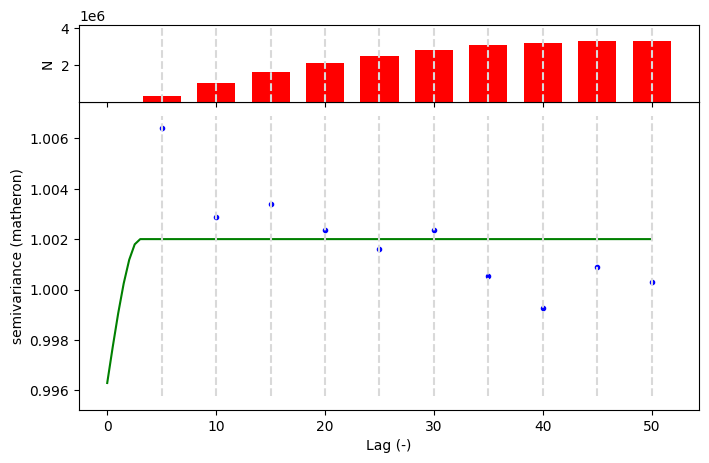

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skgstat import Variogram, OrdinaryKriging, plotting

#plotting.backend('plotly')

# Create a 2D image with some missing data
img = np.random.normal(0,1,(100, 100))
#img[3:5, 3:5] = np.nan
img[45:55, 45:55] = np.nan

# Define the spatial coordinates of the image
x, y = np.meshgrid(np.arange(img.shape[0]), np.arange(img.shape[1]))

data_points = img[np.isnan(img) == False]
x_points = x[np.isnan(img) == False]
y_points = y[np.isnan(img) == False]

model = 'spherical'
#model = 'gaussian'
#model = 'exponential'

V = Variogram(list(zip(x_points, y_points)), 
              data_points,
              normalize = False,
              model = model,
              use_nugget = True, 
              maxlag=50)

fig = V.plot()

100


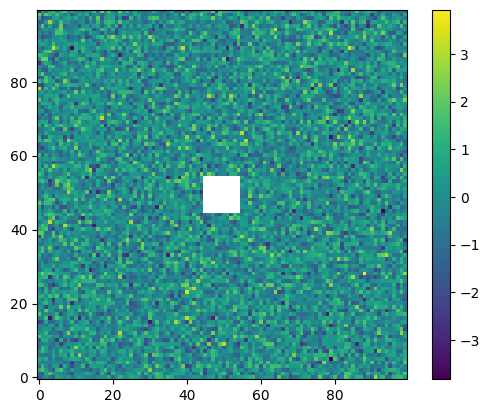

In [2]:
print(len(img[np.isnan(img)]))

plt.imshow(img,origin='lower')
plt.colorbar()

In [3]:
V.fit_sigma = 'linear'
#fig1 = V.plot(show=False)
#fig1.update_layout(title='Linear Weights', width = 1000)

V.fit_sigma = 'sqrt'
#fig2 = V.plot(show=False)
#fig2.update_layout(title='Sqrt-decrease Weights', width = 1000)

#fig1.show()
#fig2.show()

In [8]:
ok =  OrdinaryKriging(V, min_points=2, max_points=10, mode='exact')

# We calculate the hydraulic head on our regular grid,
# and we make the result in a good shape
hh_hat = ok.transform(x.flatten(), y.flatten()).reshape(x.shape)

# We calculate the kriging error on our grid:
s2 = ok.sigma.reshape(x.shape)

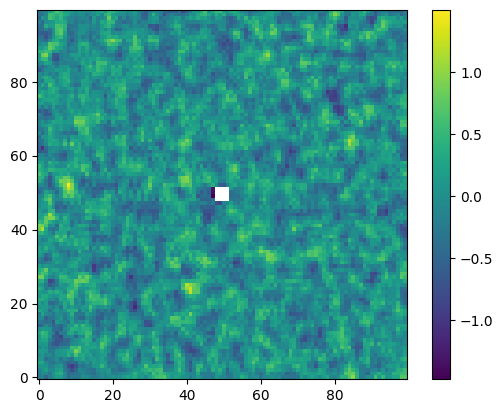

In [9]:
plt.imshow(hh_hat,origin='lower')
plt.colorbar()